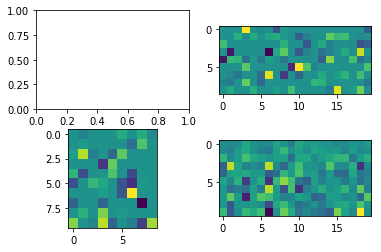

In [51]:
import numpy as np
import matplotlib.pylab as plt

# Data generation
I=10
J=20
K=9

# initialize it from random numbers ("randn" can be positive or negative)
Wtrue=np.dot(2,np.random.randn(I,K))
Htrue=np.dot(2,np.random.randn(K,J))


# make the true factor matrices more sparse
randomMask1=(np.random.rand(I,K) < 0.5)
randomMask2=(np.random.rand(K,J) < 0.5)


Wtrue=np.multiply(Wtrue,randomMask1)
Htrue=np.multiply(Htrue,randomMask2)

# generate the data (multiply the matrices and add some more noise)
dataNoise=1
X=np.dot(Wtrue,Htrue) + np.dot(dataNoise,np.random.randn(I,J))

# visualize the data with the true factor matrices
# method2
f, ax = plt.subplots(2,2)
ax[0,1].imshow(Htrue)
ax[1,0].imshow(Wtrue)
ax[1,1].imshow(X)


Implement the ALS update rules

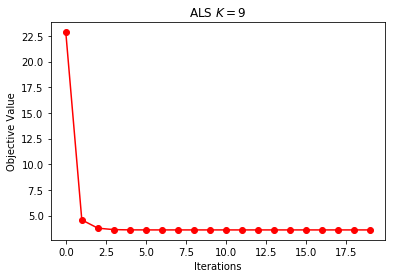

In [52]:
## Algorithm 1: Alternating least squares (ALS)

# Initialize the factor matrix
Wals=np.dot(2,np.random.randn(I,K))
Hals=np.dot(2,np.random.randn(K,J))
MaxIterAls = 20;

# record the objective function values
obj_als = np.zeros((MaxIterAls,1))

for i in range(MaxIterAls):
    Wals = X.dot(Hals.transpose()).dot(np.linalg.inv(Hals.dot(Hals.transpose())))
    Hals = np.linalg.inv(Wals.transpose().dot(Wals)).dot(Wals.transpose()).dot(X)
    Xhat = Wals.dot(Hals)
    obj_als[i] = 0.5 * (np.linalg.norm(X - Xhat))**2
    # visualize the iterations
    # f, ax = plt.subplots(2,2)
    # ax[0,1].imshow(Hals)
    # ax[0,1].set_title('H' + str(i + 1))
    # ax[1,0].imshow(Wals)
    # ax[1,0].set_title('W' + str(i + 1))
    # ax[1,1].imshow(Xhat)
    # ax[1,1].set_title('X' + str(i + 1))

# draw the objective function
f, ax = plt.subplots(1,1)
plt.plot(obj_als,'r-o')
plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.title('ALS $K=9$')
plt.savefig("alsK9.png")

Algorithm 2: Gradient Descent (GD)


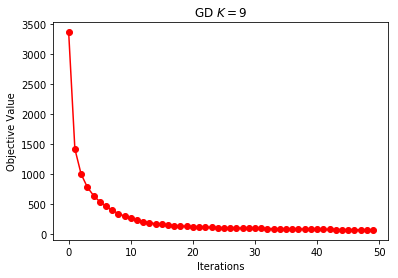

In [53]:
Wgd = np.dot(2,np.random.randn(I,K))
Hgd = np.dot(2,np.random.randn(K,J))
MaxIterGd = 50

# record the objective function values
obj_gd = np.mat(np.zeros((MaxIterGd,1)))
# set the step size
eta = 0.01



for i in range(MaxIterGd):
    Wgd = Wgd + eta * (X - Wgd.dot(Hgd)).dot(Hgd.transpose())
    Hgd = Hgd + eta * Wgd.transpose().dot(X - Wgd.dot(Hgd))
    Xhat = Wgd.dot(Hgd)
    obj_gd[i] = 0.5 * (np.linalg.norm(X - Xhat))**2
    # visualize the iterations
    # f, ax = plt.subplots(2,2)
    # ax[0,1].imshow(Hgd)
    # ax[0,1].set_title('H' + str(i + 1))
    # ax[1,0].imshow(Wgd)
    # ax[1,0].set_title('W' + str(i + 1))
    # ax[1,1].imshow(Xhat)
    # ax[1,1].set_title('X' + str(i + 1))

# draw the objective function
f, ax = plt.subplots(1,1)
plt.plot(obj_gd,'r-o')
plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.title('GD $K=9$')
#plt.show()
plt.savefig('gdK9.png')

## Non-Negative Matrix Factorization with Multiplicative Update Rules



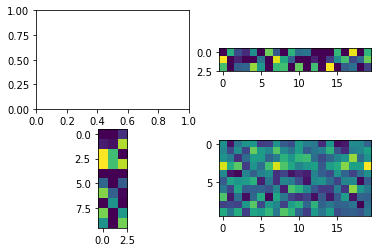

In [126]:
# Data generation
I=10
J=20
K=3

Wtrue=np.dot(2,np.random.rand(I,K))
Htrue=np.dot(2,np.random.rand(K,J))

randomMask1=(np.random.rand(I,K) < 0.5)
randomMask2=(np.random.rand(K,J) < 0.5)

Wtrue=np.multiply(Wtrue,randomMask1)
Htrue=np.multiply(Htrue,randomMask2)

dataNoise=5
X=np.dot(Wtrue,Htrue) + np.dot(dataNoise,np.random.rand(I,J))

# visualize the data with the true factor matrices
f, ax = plt.subplots(2,2)
ax[0,1].imshow(Htrue)
ax[1,0].imshow(Wtrue)
ax[1,1].imshow(X)


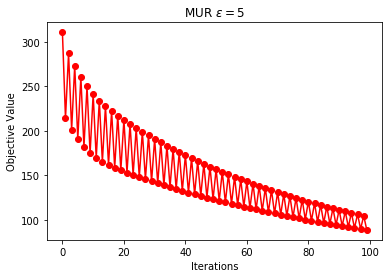

In [140]:
# Algorithm: Multiplicative Update Rules

# Initialize the factor matrices
Wmur=np.dot(2,np.random.rand(I,K))
Hmur=np.dot(2,np.random.rand(K,J))
MaxIterMur = 100

# record the objective function values
obj_mur = np.zeros((MaxIterMur,1))  

O = np.ones((I,J))
Xhat = Wmur.dot(Hmur)
eps = 0.01

for i in range(MaxIterMur):
    # Update W
    Wmur = np.multiply(Wmur,np.divide(np.divide(X,Xhat).dot(Hmur.transpose()),O.dot(Hmur.transpose())))
    # Update H
    Hmur = np.multiply(Hmur,np.divide(Wmur.transpose().dot(np.divide(X,Xhat)),Wmur.transpose().dot(O)))

    Xhat = Wmur.dot(Hmur)
    Xhat = Xhat + eps
    obj_mur[i] = np.nansum(np.multiply(X,(np.log(np.divide(X,Xhat)))) - X + Xhat)
    # visualize the iterations
    # f, ax = plt.subplots(2,2)
    # ax[0,1].imshow(Hmur)
    # ax[0,1].set_title('H' + str(i + 1))
    # ax[1,0].imshow(Wmur)
    # ax[1,0].set_title('W' + str(i + 1))
    # ax[1,1].imshow(Xhat)
    # ax[1,1].set_title('X' + str(i + 1))

# draw the objective function
f, ax = plt.subplots(1,1)
plt.plot(obj_mur,'r-o')
plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.title('MUR $\epsilon=5$')
plt.savefig('mURE5.png')